In [6]:
import json
import os
dir_path="./patch_results"
dataset="known"
model_name="Qwen2-7B-Instruct"
patch_type="recover_top"
file_name = f"{model_name}_{dataset}_{patch_type}.json"
data_path = os.path.join(dir_path, file_name)
with open(data_path, 'r') as file:
    data_all = json.load(file)

In [7]:
def split_key_value(key):
    parts = key.split('_noise_')
    if len(parts) != 2:
        return None, None
    method = parts[0].split('_')[0]  # Get first part (e.g., 'all' from 'all_noise')
    noise_level = round(float(parts[1]), 1)  # Convert noise level to float and round
    return method, noise_level

In [8]:
results = {}
for i, data in enumerate(data_all):
    for key, value in data.items():
        if 'noise' in key:
            method, noise_level = split_key_value(key)
            if method not in results:
                results[method] = {}
            if noise_level not in results[method]:
                results[method][noise_level] = []
            results[method][noise_level].append(value)
            

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate averages
avg_results = {}
for method in results:
    avg_results[method] = {}
    for noise_level in results[method]:
        values = results[method][noise_level]
        avg_results[method][noise_level] = np.mean(values)

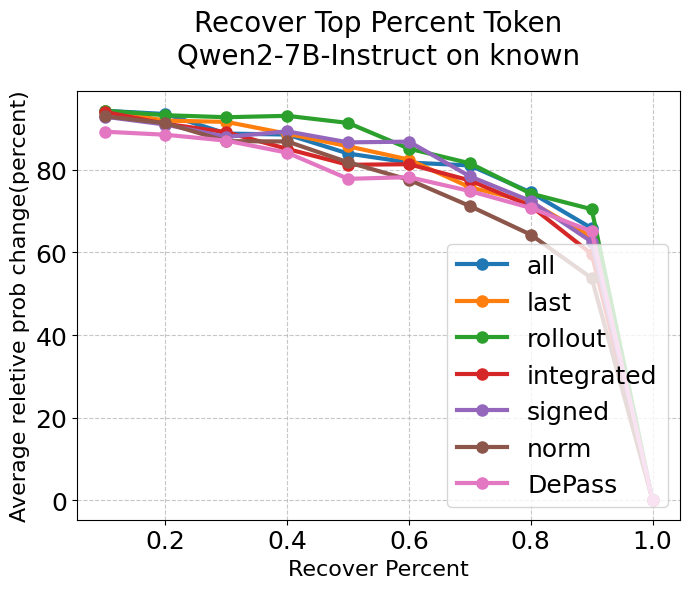

In [10]:
# Create plot with increased figure size
plt.figure(figsize=(7, 6))  # Adjusted figure size

# Plot lines for each method with name replacement
for method in avg_results:
    noise_levels = sorted(avg_results[method].keys())
    avg_values = [avg_results[method][noise] for noise in noise_levels]
    # Replace method name in legend if it's 'decompose'
    label = 'DePass' if method == 'decompose' else method
    plt.plot(noise_levels, avg_values, marker='o', label=label, linewidth=3, markersize=8)

# Set text based on patch type
if patch_type == "recover_top":
    x_text = "Recover Percent"
    action_text = "Recover"
else:
    x_text = "Disrupt Percent"
    action_text = "Disrupt"

# Create full title with model and dataset info
title_text = f"{action_text} Top Percent Token\n{model_name} on {dataset}"

# Set plot properties with larger font sizes
plt.xlabel(x_text, fontsize=16)
plt.ylabel('Average reletive prob change(percent)', fontsize=16)
plt.title(title_text, fontsize=20, pad=20)
plt.legend(loc='lower left', fontsize=18)
plt.legend(loc='lower right', fontsize=18)

# Increase tick label sizes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()